<a href="https://colab.research.google.com/github/bahadurshubham/Darknet/blob/master/Credit_card_fraud_detection_using_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the datasets and displaying the value contents 
import pandas as pd
import numpy as np
df = pd.read_csv('creditcard.csv')
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
#sampling the datatsets and changing the index of the datasets so as to be able to proprely distinguish the datasets 
df = df.sample(frac=1, random_state=1)
df = df.reset_index(drop=True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,119907.0,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,...,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,1.79,0
1,78340.0,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,...,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,1.98,0
2,82382.0,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,...,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,0.89,0
3,31717.0,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,...,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,15.98,0
4,80923.0,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,...,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,0.76,0


In [ ]:
# Converting the datasets to numpy and distributing the datasets into training and test datasets
as_np = df.to_numpy()

index = int(len(as_np) * 0.92)
X_train , Y_train = as_np[:index, :-1] , as_np[:index , -1]
X_test , Y_test = as_np[index: , :-1] , as_np[index: , -1]

(X_train.shape , Y_train.shape) , (X_test.shape , Y_test.shape)

(((262022, 30), (262022,)), ((22785, 30), (22785,)))

In [ ]:
#Scaling the test and training datasets so the datasets are balanced
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Implementing the linear regression model on the test datasets for binary classification 
from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(X_train , Y_train)
test_predictions = model.predict(X_test)

pd.value_counts(test_predictions)

0.0    22757
1.0       28
dtype: int64

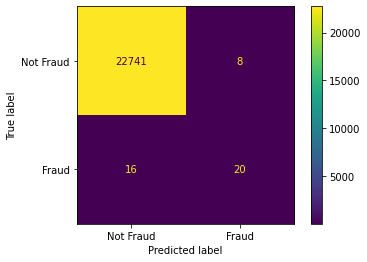

In [ ]:
# Implementing confusion matrix 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, test_predictions , labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm ,
                              display_labels = ['Not Fraud' , 'Fraud'])

disp.plot()

In [ ]:
# assigning values to the confusion matrix
tn, fp, fn, tp = cm.ravel()

s = '''
True Negatives : {0}
False Positives : {1}
False negatives : {2}
True Positivss : {3}
'''.format(tn, fp, fn, tp)

print(s)


True Negatives : 22741
False Positives : 8
False negatives : 16
True Positivss : 20



In [ ]:
# Implementing the accuracy function 
def accuracy(tn, fp, fn, tp):
  return ((tn+tp) / (tn+fp+fn+tp))

'Accuracy : {0}'.format(accuracy(tn, fp ,fn, tp))

'Accuracy : 0.9989466754443713'

In [ ]:
#implementing the recall function (total positivity rate : True positive / total number of positives)

def recall(tp, fn):
  return tp / (tp+fn)
R = recall(tp, fn)
'Recall/True Positive Rate : {0}'.format(recall(tp, fn))

'Recall/True Positive Rate : 0.5555555555555556'

In [ ]:
#implementing the specificity function or the true negative rate
def specificity(tn ,fp):
  return tn / (tn+fp)

'Specificity : {0}'.format(specificity(tn, fp))

'Specificity : 0.9996483361906018'

In [ ]:
#implementing precision which is the calculation of calculating total number of predicted positive values
def precision(tp, fp):
  return tp / (tp+fp)
P = precision(tp, fp)
'Precision : {0}'.format(precision(tp ,fp))

'Precision : 0.7142857142857143'

In [ ]:
#implementing the f1 score
def f1score(precision , recall):
  return (2*precision*recall) / (precision+recall)

'F1 Score : {0}'.format(f1score(P, R))

'F1 Score : 0.6250000000000001'

In [ ]:
probabilites = model.predict_proba(X_test)[:, -1]
probabilites

array([0.00012139, 0.0003532 , 0.00030147, ..., 0.00473659, 0.00017273,
       0.00171865])

In [ ]:
#classification report

from sklearn.metrics import classification_report

print(classification_report(Y_test, test_predictions , labels=[0,1] , target_names = ['Not Fraud' , 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     22749
       Fraud       0.71      0.56      0.63        36

    accuracy                           1.00     22785
   macro avg       0.86      0.78      0.81     22785
weighted avg       1.00      1.00      1.00     22785



In [ ]:
# implementing matthews correlation coffecient 

def MCC(tn, fp ,fn, tp):
  return  ((tp*tn) - (fp*fn)) / (np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)))


'Matthews Correltion Coffecient : {0}'.format(MCC(tn, fp ,fn, tp))

'Matthews Correltion Coffecient : 0.6294313746803477'